In [55]:
%pylab inline

import numpy as np
import tensorflow as tf

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from IPython.display import SVG, Image
from keras.utils.vis_utils import model_to_dot

Populating the interactive namespace from numpy and matplotlib


## Data

In [2]:
wine = load_wine()

# One-hot Encoded target data
onehot_encoder = OneHotEncoder(sparse=False)
target = onehot_encoder.fit_transform(wine.target.reshape(-1, 1))

# Split Train and Test data
train_x, test_x, train_y, test_y = train_test_split(wine.data, target, test_size=0.2)

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', test_x.shape)
print('test_y:', test_y.shape)

train_x: (142, 13)
train_y: (142, 3)
test_x: (36, 13)
test_y: (36, 3)


## Deep Learning 

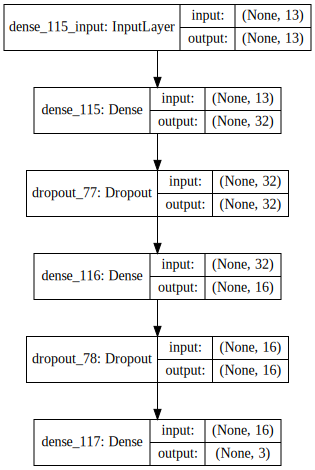

In [64]:
def create_model(seed=0, dense1=32, dense2=16, dropout1=0.5, dropout2=0.5):
    np.random.seed(seed)
    tf.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(dense1, activation='relu', input_shape=(13,)))
    if dropout1 is not None:
        model.add(Dropout(dropout1))
    model.add(Dense(dense2, activation='relu'))
    if dropout2 is not None:
        model.add(Dropout(dropout2))
    model.add(Dense(3, activation='relu'))
    model.compile('adam', loss='categorical_crossentropy')
    return model

model = create_model()
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [75]:
model = create_model()
weights = np.array(model.get_weights())
for i in range(len(weights)):
    print(np.sum(weights[i]**2))
model.get_

17.5502
0.0
20.9954
0.0
4.4475
0.0


(32,)

In [14]:
weights = np.array(model.get_weights())
for i in range(len(weights)):
    print(np.sum(weights[i]**2))

18.1474
0.0
22.1736
0.0
4.84896
0.0


In [77]:
model = create_model()
model.fit(train_x, train_y, epochs=30, batch_size=512, validation_data=(test_x, test_y))

Train on 142 samples, validate on 36 samples
Epoch 1/30
142/142 [==============================] - 1s 4ms/step - loss: 6.1612 - val_loss: 6.6827
Epoch 2/30
142/142 [==============================] - 0s 48us/step - loss: 6.0524 - val_loss: 6.6813
Epoch 3/30
142/142 [==============================] - 0s 51us/step - loss: 5.4949 - val_loss: 6.6803
Epoch 4/30
142/142 [==============================] - 0s 57us/step - loss: 5.1873 - val_loss: 6.6796
Epoch 5/30
142/142 [==============================] - 0s 62us/step - loss: 5.4511 - val_loss: 6.6793
Epoch 6/30
142/142 [==============================] - 0s 67us/step - loss: 5.3049 - val_loss: 6.6795
Epoch 7/30
142/142 [==============================] - 0s 48us/step - loss: 4.8699 - val_loss: 6.6798
Epoch 8/30
142/142 [==============================] - 0s 52us/step - loss: 5.1624 - val_loss: 6.4171
Epoch 9/30
142/142 [==============================] - 0s 50us/step - loss: 5.1893 - val_loss: 6.0396
Epoch 10/30
142/142 [==========================

In [76]:
model = create_model()
model.fit(train_x, train_y, epochs=30, batch_size=512, validation_data=(test_x, test_y))

Train on 142 samples, validate on 36 samples
Epoch 1/30
142/142 [==============================] - 1s 6ms/step - loss: 6.1612 - val_loss: 6.6827
Epoch 2/30
142/142 [==============================] - 0s 45us/step - loss: 6.0524 - val_loss: 6.6813
Epoch 3/30
142/142 [==============================] - 0s 43us/step - loss: 5.4949 - val_loss: 6.6803
Epoch 4/30
142/142 [==============================] - 0s 53us/step - loss: 5.1873 - val_loss: 6.6796
Epoch 5/30
142/142 [==============================] - 0s 58us/step - loss: 5.4511 - val_loss: 6.6793
Epoch 6/30
142/142 [==============================] - 0s 48us/step - loss: 5.3049 - val_loss: 6.6795
Epoch 7/30
142/142 [==============================] - 0s 48us/step - loss: 4.8699 - val_loss: 6.6798
Epoch 8/30
142/142 [==============================] - 0s 52us/step - loss: 5.1624 - val_loss: 6.4171
Epoch 9/30
142/142 [==============================] - 0s 44us/step - loss: 5.1893 - val_loss: 6.0396
Epoch 10/30
142/142 [==========================